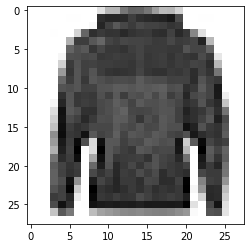

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.load("fashion_mnist_images.npy")
y = np.load("fashion_mnist_labels.npy")
d, n= x.shape
i = 0 #Index of the image to be visualized
plt.imshow(np.reshape(x[:,i], (int(np.sqrt(d)),int(np.sqrt(d)))), cmap="Greys")
plt.show()

In [108]:
x.shape

(784, 6000)

In [109]:
y.shape

(1, 6000)

In [7]:
train_x = x[:,0:5000]
train_y = y[:,0:5000]
test_x = x[:,5000:6000]
test_y = y[:,5000:6000]

In [141]:
train_x.shape

(784, 5000)

In [142]:
train_y.shape

(1, 5000)

In [143]:
test_x.shape 

(784, 1000)

In [144]:
test_y.shape

(1, 1000)

In [2]:
def hessian(theta,X,Y):
    hessian_matrix = 2*np.eye(X.shape[1])
    for i in range(X.shape[0]):
        xi = X[i].T
        yi = Y[i]
        hessian_matrix += ((yi**2*np.exp(yi*(theta.T@xi)))/((1+np.exp(yi*(theta.T@xi)))**2))*np.tensordot(xi.T,xi,axes=0)
    return hessian_matrix

In [3]:
def gradient(theta,X,Y):
    gradient_vector = 2*theta
    for i in range(X.shape[0]):
        xi = X[i].T
        yi = Y[i]
        gradient_vector -= (1/(1+np.exp(yi*(theta.T@xi))))*yi*xi
    return gradient_vector

In [4]:
def loss(theta,X,Y):
    loss = theta.T@theta
    for i in range(X.shape[0]):
        xi = X[i].T
        yi = Y[i]
        loss += np.log(1+np.exp(-yi*(theta.T@xi)))
    return loss

In [5]:
def newton_iteration(theta,X,Y):
    hessian_m = hessian(theta,X,Y)
    gradient_v = gradient(theta,X,Y)
    new_theta = theta - np.linalg.inv(hessian_m)@gradient_v
    return new_theta

In [8]:
X = np.c_[np.ones(train_x.shape[1]),train_x.T]
Y = train_y.T
theta0 = np.zeros(X.shape[1])
old_theta = theta0
num_iteration = 0
theta_list = []
loss_list = []
done = False
while not done:
    new_theta = newton_iteration(old_theta,X,Y)
    if (abs(loss(new_theta,X,Y)-loss(old_theta,X,Y))/loss(old_theta,X,Y)) <= 1e-6:
        done = True
    old_theta = new_theta
    theta_list.append(new_theta)
    num_iteration += 1
for theta in theta_list:
    loss_1 = loss(theta,X,Y)
    loss_list.append(loss_1)

In [9]:
loss_list

[array([1131.33465863]),
 array([702.62676025]),
 array([540.14312698]),
 array([478.80442326]),
 array([460.10607107]),
 array([456.81405311]),
 array([456.63968856]),
 array([456.63896507]),
 array([456.63896506])]

In [10]:
num_iteration

9

In [19]:
def logistic(theta, xi):
    return 1/(1+np.exp(-theta.T@xi))
pred_labels = []
X = np.c_[np.ones(test_x.shape[1]),test_x.T]
Y = test_y.T
logistic_values = []
for i in range(X.shape[0]):
    xi = X[i].T
    logistic_value = logistic(new_theta, xi)
    logistic_values.append(logistic_value)
    if logistic_value > 0.5:
        pred_label = 1
    else:
        pred_label = -1
    pred_labels.append(pred_label)
misclassified = 0
mis_log_list = []
for i in range(test_y.shape[1]):
    if test_y[0,i] != pred_labels[i]:
        misclassified += 1
        mis_log_list.append((logistic_values[i],i))
test_error = misclassified/len(pred_labels)
test_error

0.034

In [12]:
class_list = [0,0]
for i in test_y[0,:]:
    if i == -1:
        class_list[0] += 1
    if i == 1:
        class_list[1] += 1
class_list

[508, 492]

In [27]:
abs_mis_log_list = []
for i in mis_log_list:
    abs_mis_log_list.append((abs(i[0]-0.5),i[1]))
top_20_misclassified_list = [i[1] for i in sorted(abs_mis_log_list,key=lambda x: x[0])[:20]]
top_20_misclassified_list

[957,
 554,
 927,
 565,
 772,
 143,
 864,
 905,
 119,
 24,
 868,
 248,
 59,
 875,
 931,
 422,
 477,
 189,
 700,
 45]

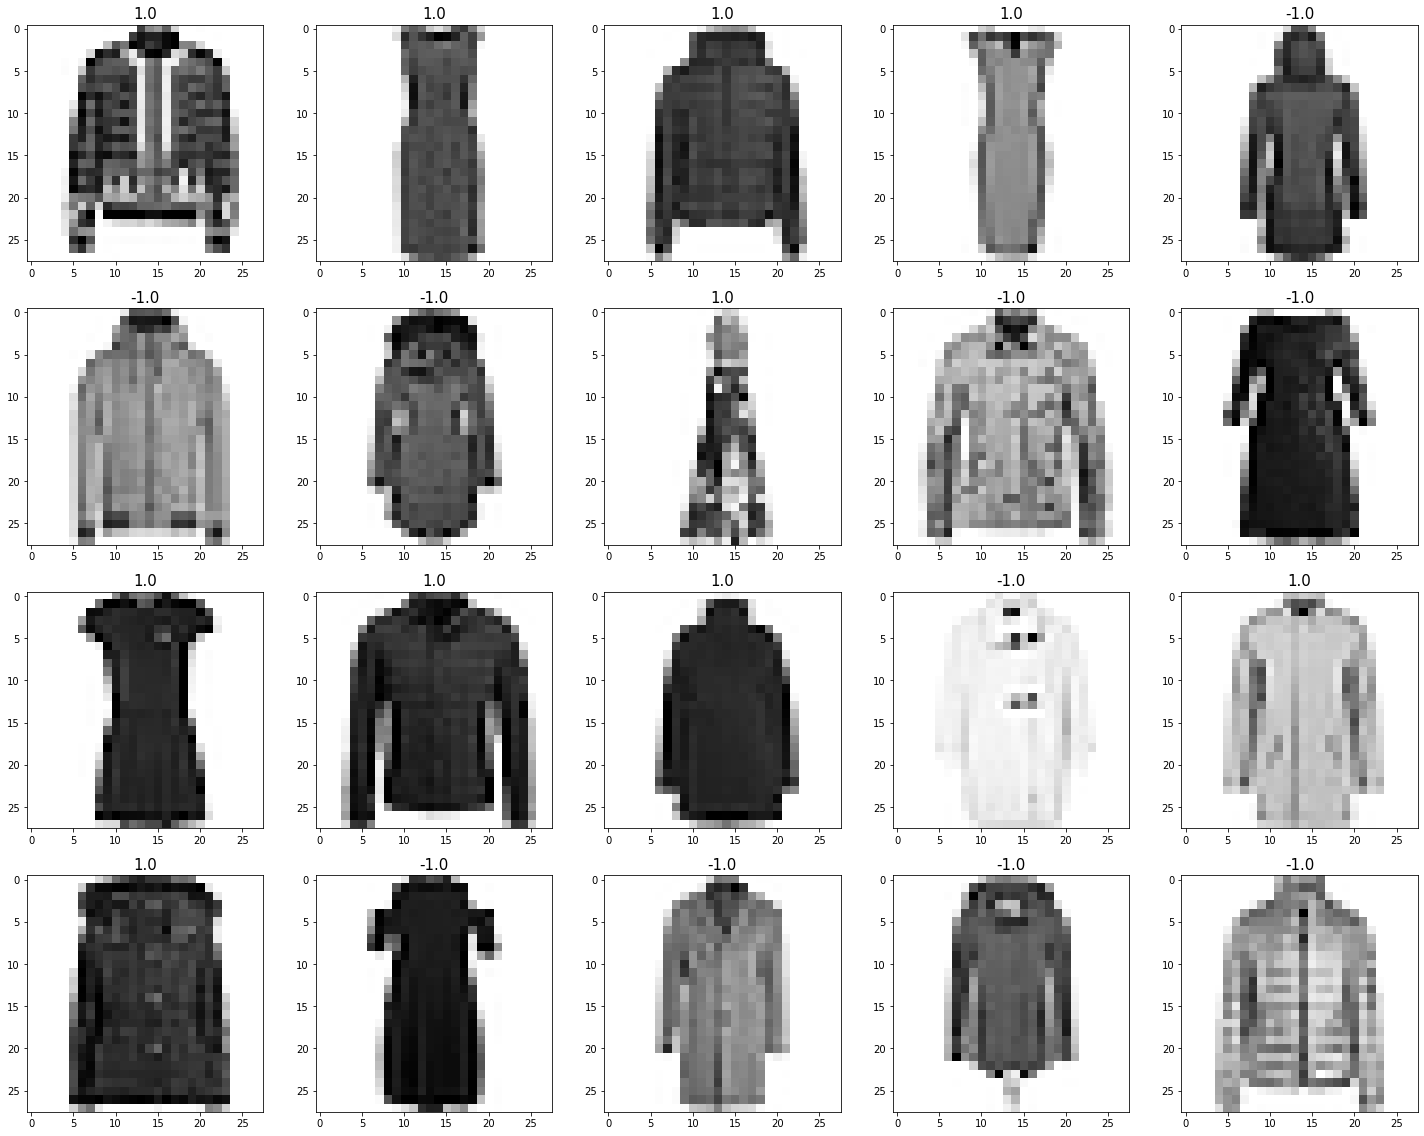

In [26]:
fig,axs = plt.subplots(4,5,figsize=(25,20))
j = 0
for i in top_20_misclassified_list:
    axs[j//5,j%5].imshow(np.reshape(x[:,i], (int(np.sqrt(d)),int(np.sqrt(d)))), cmap="Greys")
    axs[j//5,j%5].set_title(test_y[0,i], fontsize=15)
    j += 1